<a href="https://colab.research.google.com/github/joyboy994/Review_Sentiment_Analysis/blob/main/Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# To load dataset

df=pd.read_csv("review.csv", encoding='latin-1')
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [ ]:
# To check the total number of data in the dataset
df.shape

(999, 3)

In [ ]:
# To remove unwanted columns permanently removing them
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.head()

,review,sentiment
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0


In [ ]:
# To check Null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
# To check datatype
df.dtypes

review       object
sentiment     int64
dtype: object

In [ ]:
# Here sentiment is a target or output variable which is predict
# How many class present in sentiment column
df['sentiment'].value_counts()

1    500
0    499
Name: sentiment, dtype: int64

In [ ]:
# Applying LabelEncoder on sentiment column
from sklearn.preprocessing import LabelEncoder
# Create object of LabelEncoder class
le=LabelEncoder()
df['sentiment']=le.fit_transform(df['sentiment'])
df.dtypes

review       object
sentiment     int64
dtype: object

In [ ]:
df['sentiment'].value_counts()

1    500
0    499
Name: sentiment, dtype: int64

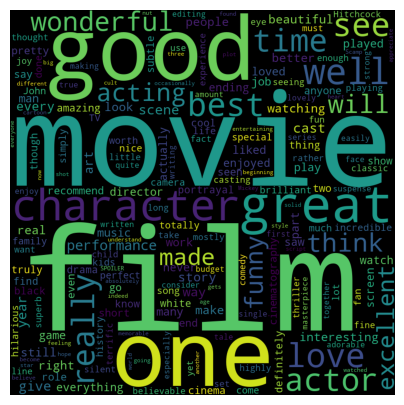

In [ ]:
# First create a WordCloud for spam category
# Create onject of WordCloud class

wc=WordCloud(width=800, height=800, background_color='black', stopwords=STOPWORDS, min_font_size=10)
msg=df[df['sentiment']==1]["review"]
# print(msg)
msg="".join(msg)
# print(msg)
wc.generate(msg)
plt.figure(figsize=(5, 5))
plt.imshow(wc) # imshow() inbuilt method og matplotlib.pyplot, imshow means image show
plt.axis('off')

plt.show()

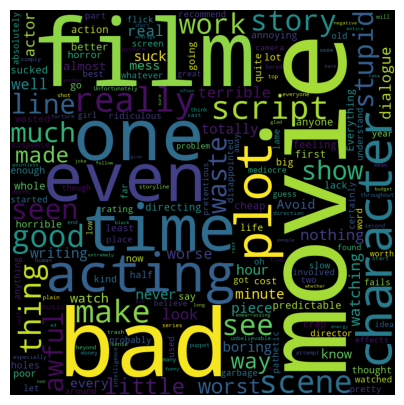

In [ ]:
# First create a WordCloud for spam category
# Create onject of WordCloud class

wc=WordCloud(width=800, height=800, background_color='black', stopwords=STOPWORDS, min_font_size=10)
msg=df[df['sentiment']==0]["review"]
# print(msg)
msg="".join(msg)
# print(msg)
wc.generate(msg)
plt.figure(figsize=(5, 5))
plt.imshow(wc) # imshow() inbuilt method og matplotlib.pyplot, imshow means image show
plt.axis('off')

plt.show()

In [ ]:
# Text Preprocessing apply on Input column message
#1. list of stop words
stop=stopwords.words('english') # stop used defined object of stopwords class

In [ ]:
# Create user defined function for text preprocessing
def clean_text(msg):   # clean_text is a user defined function name and msg is input parameter
    # First step: convert messages into lower case
    msg=msg.lower()
    # Second step: We use Tokenizers means sentence break into words(tokens)
    tokens=word_tokenize(msg)
    # print(tokens)
    # isalpha(): Only given string is alphabets only
    # filtering only alphabets, use list comprehension
    words=[t for t in tokens if t.isalpha()] # only retrieves the alphabets in the given sentence from msg and removes all the special characters and numerical values.
    # print("\n After removing number and special characters.")
    # print(words)

    # Next step to remove stopwords
    words=[w for w in words if w not in stop]
    # print(words)

    # Next step is Lemmatization
    # Create the object of WordLemmatizer class
    lemma=WordNetLemmatizer()
    lemma_words=[lemma.lemmatize(w) for w in words]
    # print(lemma_words)
    return " ".join(lemma_words)

In [ ]:
# Apply user defined function clean_text() on the entire rows of Message column in our dataset
df['review']=df['review'].apply(clean_text)
df['review']

0      sure lost flat character audience nearly half ...
1      attempting artiness black white clever camera ...
2                            little music anything speak
3      best scene movie gerardo trying find song keep...
4      rest movie lack art charm meaning emptiness wo...
                             ...                        
994        got bored watching jessice lange take clothes
995    unfortunately virtue film production work lost...
996                                    word embarrassing
997                                    exceptionally bad
998             insult one intelligence huge waste money
Name: review, Length: 999, dtype: object

In [ ]:
df.head()

,review,sentiment
0,sure lost flat character audience nearly half ...,0
1,attempting artiness black white clever camera ...,0
2,little music anything speak,0
3,best scene movie gerardo trying find song keep...,1
4,rest movie lack art charm meaning emptiness wo...,0


In [ ]:
# Seperate intput and output from given dataset df
X=df['review'] # input
Y=df['sentiment'] # Output

In [ ]:
# traintestsplit
# split data into train test (70%-30%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
X_train.shape,X_test.shape

((699,), (300,))

In [ ]:
Y_train.shape,Y_test.shape

((699,), (300,))

In [ ]:
# Count the number of words in each records in given dataset
# Declare empty list for whole number of words
sent_len=[]  # User defined list object
for sent in df['review']:
    sent_len.append(len(word_tokenize(sent)))

# To add new_column for word length in given dataset df
df['sent_length']=sent_len

In [ ]:
df.head(10)

,review,sentiment,sent_length
0,sure lost flat character audience nearly half ...,0,8
1,attempting artiness black white clever camera ...,0,17
2,little music anything speak,0,4
3,best scene movie gerardo trying find song keep...,1,10
4,rest movie lack art charm meaning emptiness wo...,0,10
5,wasted two hour,0,3
6,saw movie today thought good effort good messa...,1,9
7,bit predictable,0,2
8,loved casting jimmy buffet science teacher,1,6
9,baby owl adorable,1,3


In [ ]:
# To find the maximum length
max(sent_len)

38

In [ ]:
# To find the minimum length
min(sent_len)

0

In [ ]:
df['sent_length'].value_counts()

5     126
3     109
4     104
2      93
7      81
6      75
8      63
9      61
10     39
1      39
12     38
11     37
14     25
13     24
15     14
16     13
17      9
21      8
19      8
18      7
20      5
0       3
24      3
26      3
23      2
22      2
28      2
27      1
38      1
36      1
30      1
33      1
25      1
Name: sent_length, dtype: int64

In [ ]:
np.quantile(sent_len, 0.95)   #95% means 95/100=0.95

17.0

In [ ]:
# We can see that 95% review text are of lengths less than or equal to 17
# We will keep the max length to 17
max_length=17

In [ ]:
# Tokenization: word level and provide index to each and every word in given input
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# Create object of Tokenize class
tok=Tokenizer(char_level=False,split=' ')  # Tokenize word level
# Provide index to each words of X_train
tok.fit_on_texts(X_train) # fit_on_texts() inuilt method of Tokenizer

In [ ]:
# To show unique ID of each word, use inbuilt attibutes index_word of Tokenizer class
tok.index_word

{1: 'movie',
 2: 'film',
 3: 'one',
 4: 'character',
 5: 'bad',
 6: 'like',
 7: 'time',
 8: 'good',
 9: 'even',
 10: 'acting',
 11: 'great',
 12: 'scene',
 13: 'well',
 14: 'really',
 15: 'see',
 16: 'story',
 17: 'best',
 18: 'made',
 19: 'actor',
 20: 'make',
 21: 'plot',
 22: 'work',
 23: 'wonderful',
 24: 'better',
 25: 'look',
 26: 'ever',
 27: 'thing',
 28: 'could',
 29: 'also',
 30: 'love',
 31: 'way',
 32: 'real',
 33: 'seen',
 34: 'part',
 35: 'would',
 36: 'think',
 37: 'performance',
 38: 'get',
 39: 'excellent',
 40: 'much',
 41: 'year',
 42: 'nothing',
 43: 'anyone',
 44: 'script',
 45: 'line',
 46: 'never',
 47: 'funny',
 48: 'little',
 49: 'watch',
 50: 'recommend',
 51: 'cast',
 52: 'life',
 53: 'man',
 54: 'music',
 55: 'go',
 56: 'watching',
 57: 'stupid',
 58: 'many',
 59: 'two',
 60: 'lot',
 61: 'people',
 62: 'awful',
 63: 'terrible',
 64: 'worth',
 65: 'pretty',
 66: 'still',
 67: 'art',
 68: 'saw',
 69: 'give',
 70: 'worse',
 71: 'interesting',
 72: 'waste',
 73:

In [ ]:
X_train[0] # first record

'sure lost flat character audience nearly half walked'

In [ ]:
# Inbuilt method texts_to_sequences() of Tokenizer class
sequence_X_train=tok.texts_to_sequences(X_train)

In [ ]:
sequence_X_train[0] # All of these are index numbers of the sentence above ("sure lost flat character audience nearly half walked")
# All the respective sentences containing words are having the index or the token number so all of them will be shown in the sequence command.
# if there are more words in the sentence then it will show the first token and the last token for e.g. [274, 982]

[416, 742, 276, 743, 417, 418, 744, 197]

In [ ]:
# Add padding sequence
# Use unbuilt class sequence
from tensorflow.keras.preprocessing import sequence

# Create object of sequence class and passing the following arguments
sequence_train=sequence.pad_sequences(sequence_X_train, maxlen=max_length)
sequence_train

array([[  0,   0,   0, ..., 418, 744, 197],
       [  0,   0,   0, ...,   0, 277,   1],
       [  0,   0,   0, ...,   0, 278, 745],
       ...,
       [  0,   0,   0, ...,   9,  32,   1],
       [  0,   0,   0, ...,  73,  28,  55],
       [  0,   0,   0, ...,   0, 341, 677]])

In [ ]:
type(sequence_train), sequence_train.ndim

(numpy.ndarray, 2)

In [ ]:
sequence_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0, 416, 742, 276, 743,
       417, 418, 744, 197])

In [ ]:
vocab_len=len(tok.index_word)
vocab_len

2099

In [ ]:
# Perform model with the help of RNN
# Call library
from tensorflow.keras.models import Sequential

In [ ]:
# Create object of Sequential class
model=Sequential()

In [ ]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
model.add(Embedding(vocab_len+1,500,input_length=max_length,mask_zero=True))
# 500: It is the length of the output
# Take RNN(Recurrent Neural Network)
model.add(SimpleRNN(units=64,activation='tanh'))
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.2))  # To reduce overfitting
model.add(Dense(units=1,activation='sigmoid')) # output layer

In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Early stopping : - it is decided no of epochs.
#create procedure for early stopping : why to decide number of epoch
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#create object of early stopping
es=EarlyStopping(monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False)

In [ ]:
#train the model
model.fit(sequence_train,Y_train,batch_size=50,epochs=2000,validation_split=0.2,callbacks=es)

Epoch 1/2000


12/12 [==============================] - 3s 56ms/step - loss: 0.6901 - accuracy: 0.5420 - val_loss: 0.6911 - val_accuracy: 0.5714
Epoch 2/2000
12/12 [==============================] - 0s 25ms/step - loss: 0.5345 - accuracy: 0.9320 - val_loss: 0.6699 - val_accuracy: 0.5857
Epoch 3/2000
12/12 [==============================] - 0s 23ms/step - loss: 0.2994 - accuracy: 0.9732 - val_loss: 0.6769 - val_accuracy: 0.6357
Epoch 4/2000
12/12 [==============================] - 0s 24ms/step - loss: 0.1167 - accuracy: 0.9821 - val_loss: 0.8186 - val_accuracy: 0.6429
Epoch 5/2000
12/12 [==============================] - 0s 27ms/step - loss: 0.0462 - accuracy: 0.9911 - val_loss: 1.0126 - val_accuracy: 0.6714
Epoch 6/2000
12/12 [==============================] - 0s 26ms/step - loss: 0.0259 - accuracy: 0.9946 - val_loss: 1.1368 - val_accuracy: 0.6786
Epoch 7/2000
12/12 [==============================] - 0s 23ms/step - loss: 0.0177 - accuracy: 0.9946 - val_loss: 1.2011 - val_accuracy: 0.67

In [ ]:
model.evaluate(sequence_train,Y_train)

22/22 [==============================] - 0s 4ms/step - loss: 0.3092 - accuracy: 0.9299


[0.3092323839664459, 0.9298998713493347]

In [ ]:
# if predict the model, apply same process on X_test similar as X_train
X_test

507                          film lack convincing script
608                also enough hypocrisy film make vomit
452                                 even good camp value
368    make scared horrified make sympathetic towards...
242    film great actor master director significant t...
                             ...                        
459    know contract player little control script act...
415                          fan movie sucked really bad
61                             think tom hank good actor
347                                                 lame
349                              everything movie stupid
Name: review, Length: 300, dtype: object

In [ ]:
sequence_X_test=tok.texts_to_sequences(X_test)
sequence_X_test[0]

[2, 293, 287, 44]

In [ ]:
# Add padding Sequence
sequence_test=sequence.pad_sequences(sequence_X_test,maxlen=max_length)
sequence_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         2, 293, 287,  44])

In [ ]:
# test the model with 30% data, use inbuilt method predict()
Y_pred=model.predict(sequence_test).round(2)

10/10 [==============================] - 0s 5ms/step


In [ ]:
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.55      0.61       151
           1       0.62      0.75      0.68       149

    accuracy                           0.65       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.66      0.65      0.65       300

[[ 83  68]
 [ 37 112]]
